In [264]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,6)
pd.options.display.float_format = "{:,.1f}".format
plt.style.use('seaborn-v0_8-ticks')

<h1>Loading Dataset</h1>

In [265]:
df = pd.read_csv(r"D:\nevinphilbert\Portfolio\Python Builder\World Expenditure Analysis\WorldExpenditures.csv")
df.head(5)

Year    Country                                      Sector  \
0  2000  Australia                              Total function   
1  2000  Australia  Agriculture, forestry, fishing and hunting   
2  2000  Australia      Mining, manufacturing and construction   
3  2000  Australia                                   Transport   
4  2000  Australia                             Fuel and energy   

   Expenditure(million USD)  GDP(%)  
0                 153,122.6    37.4  
1                   2,195.6     0.5  
2                     905.0     0.2  
3                  11,417.4     2.8  
4                   2,251.2     0.5

<h1>Getting Overview of data, checking values & preparation for data cleaning</h1>

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25733 entries, 0 to 25732
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      25733 non-null  int64  
 1   Country                   25733 non-null  object 
 2   Sector                    25733 non-null  object 
 3   Expenditure(million USD)  25173 non-null  float64
 4   GDP(%)                    25173 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1005.3+ KB


In [267]:
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Rows: 25733
Columns: 5


In [268]:
df.describe()

Year  Expenditure(million USD)   GDP(%)
count 25,733.0                  25,173.0 25,173.0
mean   2,011.3                  36,561.9      4.5
std        6.1                 246,497.2      9.8
min    2,000.0                       0.0      0.0
25%    2,006.0                     132.8      0.2
50%    2,012.0                   1,171.6      1.1
75%    2,017.0                   8,350.3      3.9
max    2,021.0              10,476,081.8    131.4

In [269]:
#checking duplicates
df.duplicated(subset=['Year', 'Country', 'Sector']).sum()

0

<h2>World Expenditure Dataset from 2000 - 2021</h2>
<h3>Overview</h3>

<p>The World Expenditure dataset contains information on expenditure and GDP (%) for various countries across different sectors over multiple years. This documentation provides details about the columns present in the dataset.</p>

<h3>Columns</h3>
<ol>
    <li>
        <ul>
            <li>Year:</li>
            <li>Data Type: Integer</li>
            <li>Description: Represents the year in which the expenditure and GDP data were recorded.</li>
        </ul>
    </li>
    <li>
        <ul>
            <li>Country:</li>
            <li>Data Type: String</li>
            <li>Description: Indicates the name of the country for which expenditure and GDP data are reported.</li>
        </ul>
    </li>
    <li>
        <ul>
            <li>Sector:</li>
            <li>Data Type: String</li>
            <li>Description: Specifies the sector to which the expenditure pertains. Examples of sectors may include healthcare, education, defense, etc.</li>
        </ul>
    </li>
    <li>
        <ul>
            <li>Expenditure (million USD):</li>
            <li>Data Type: Float</li>
            <li>Description: Represents the expenditure amount in million USD for the corresponding country and sector.</li>
        </ul>
    </li>
    <li>
        <ul>
            <li>GDP (%):</li>
            <li>Data Type: Float</li>
            <li>Description: Indicates the GDP percentage for the corresponding country and sector. It represents the contribution of the sector's expenditure to the country's Gross Domestic Product (GDP) as a percentage.</li>
        </ul>
    </li>    
</ol>

<h3>Notes</h3>
    <p>The dataset contains records for multiple years, covering expenditure and GDP data for various countries and sectors.
    Expenditure values are reported in million USD. GDP (%) values represent the sector's contribution to the country's GDP as a percentage. Missing values may be present in the dataset, especially for certain countries and sectors. Careful consideration should be given to handling missing data during data analysis.</p>

In [270]:
df[df['Expenditure(million USD)'].isna() | df['GDP(%)'].isna()]

Year                Country  \
301    2000              Indonesia   
302    2000              Indonesia   
303    2000              Indonesia   
304    2000              Indonesia   
305    2000              Indonesia   
306    2000              Indonesia   
307    2000              Indonesia   
308    2000              Indonesia   
309    2000              Indonesia   
310    2000              Indonesia   
311    2000              Indonesia   
312    2000              Indonesia   
313    2000              Indonesia   
314    2000              Indonesia   
315    2000              Indonesia   
316    2000              Indonesia   
317    2000              Indonesia   
318    2000              Indonesia   
319    2000              Indonesia   
320    2000              Indonesia   
587    2000                 Serbia   
588    2000                 Serbia   
589    2000                 Serbia   
590    2000                 Serbia   
591    2000                 Serbia   
592    2000                 Serbia   
593    2000                 Serbia   
594    2000                 Serbia   
595    2000                 Serbia   
596    2000                 Serbia   
597    2000                 Serbia   
598    2000                 Serbia   
599    2000                 Serbia   
600    2000                 Serbia   
601    2000                 Serbia   
602    2000                 Serbia   
603    2000                 Serbia   
604    2000                 Serbia   
605    2000                 Serbia   
606    2000                 Serbia   
736    2000            Timor-Leste   
737    2000            Timor-Leste   
738    2000            Timor-Leste   
739    2000            Timor-Leste   
740    2000            Timor-Leste   
741    2000            Timor-Leste   
742    2000            Timor-Leste   
743    2000            Timor-Leste   
744    2000            Timor-Leste   
745    2000            Timor-Leste   
746    2000            Timor-Leste   
747    2000            Timor-Leste   
748    2000            Timor-Leste   
749    2000            Timor-Leste   
750    2000            Timor-Leste   
751    2000            Timor-Leste   
752    2000            Timor-Leste   
753    2000            Timor-Leste   
754    2000            Timor-Leste   
755    2000            Timor-Leste   
1113   2001              Indonesia   
1114   2001              Indonesia   
1115   2001              Indonesia   
1116   2001              Indonesia   
1117   2001              Indonesia   
1118   2001              Indonesia   
1119   2001              Indonesia   
1120   2001              Indonesia   
1121   2001              Indonesia   
1122   2001              Indonesia   
1123   2001              Indonesia   
1124   2001              Indonesia   
1125   2001              Indonesia   
1126   2001              Indonesia   
1127   2001              Indonesia   
1128   2001              Indonesia   
1129   2001              Indonesia   
1130   2001              Indonesia   
1131   2001              Indonesia   
1132   2001              Indonesia   
1467   2001                 Serbia   
1468   2001                 Serbia   
1469   2001                 Serbia   
1470   2001                 Serbia   
1471   2001                 Serbia   
1472   2001                 Serbia   
1473   2001                 Serbia   
1474   2001                 Serbia   
1475   2001                 Serbia   
1476   2001                 Serbia   
1477   2001                 Serbia   
1478   2001                 Serbia   
1479   2001                 Serbia   
1480   2001                 Serbia   
1481   2001                 Serbia   
1482   2001                 Serbia   
1483   2001                 Serbia   
1484   2001                 Serbia   
1485   2001                 Serbia   
1486   2001                 Serbia   
1621   2001            Timor-Leste   
1622   2001            Timor-Leste   
1623   2001            Timor-Leste   
1624   2001            Timor-Leste   
1625   2001      

In [271]:
df.groupby('Country').apply(lambda x: x.isna().sum())

Year  Country  Sector  \
Country                                                   
Afghanistan                          0        0       0   
Albania                              0        0       0   
Armenia                              0        0       0   
Australia                            0        0       0   
Austria                              0        0       0   
Azerbaijan                           0        0       0   
Belarus                              0        0       0   
Belgium                              0        0       0   
Bolivia (Plurinational State of)     0        0       0   
Brazil                               0        0       0   
Bulgaria                             0        0       0   
Canada                               0        0       0   
Chile                                0        0       0   
China                                0        0       0   
China, Hong Kong SAR                 0        0       0   
China, Macao SAR                     0        0       0   
Colombia                             0        0       0   
Cook Islands                         0        0       0   
Costa Rica                           0        0       0   
Croatia                              0        0       0   
Cyprus                               0        0       0   
Czechia                              0        0       0   
Denmark                              0        0       0   
Egypt                                0        0       0   
El Salvador                          0        0       0   
Estonia                              0        0       0   
Fiji                                 0        0       0   
Finland                              0        0       0   
France                               0        0       0   
Georgia                              0        0       0   
Germany                              0        0       0   
Greece                               0        0       0   
Guatemala                            0        0       0   
Hungary                              0        0       0   
Iceland                              0        0       0   
India                                0        0       0   
Indonesia                            0        0       0   
Iran (Islamic Republic of)           0        0       0   
Ireland                              0        0       0   
Israel                               0        0       0   
Italy                                0        0       0   
Japan                                0        0       0   
Kazakhstan                           0        0       0   
Kenya                                0        0       0   
Kiribati                             0        0       0   
Korea, Republic of                   0        0       0   
Kuwait                               0        0       0   
Kyrgyzstan                           0        0       0   
Latvia                               0        0       0   
Lithuania                            0        0       0   
Luxembourg                           0        0       0   
Malaysia                             0        0       0   
Maldives                             0        0       0   
Malta                                0        0       0   
Marshall Islands                     0        0       0   
Mauritius                            0        0       0   
Moldova, Republic of                 0        0       0   
Mongolia                             0        0       0   
Myanmar                              0        0       0   
Nauru                                0        0       0   
Nepal                                0        0       0   
Netherlands (Kingdom of the)         0        0       0   
New Zealand                          0        0       0   
Norway                               0        0       0   
Panama                               0        0       0   
Paraguay                             0        0       0   
Peru                  

In [272]:
#let's narrow it down to only countries that has null values
df[df.isna().any(axis=1)].groupby('Country').apply(lambda x: x.isna().sum())

Year  Country  Sector  Expenditure(million USD)  GDP(%)
Country                                                                       
Indonesia                 0        0       0                        60      60
Serbia                    0        0       0                       160     160
Serbia and Montenegro     0        0       0                       280     280
Timor-Leste               0        0       0                        60      60

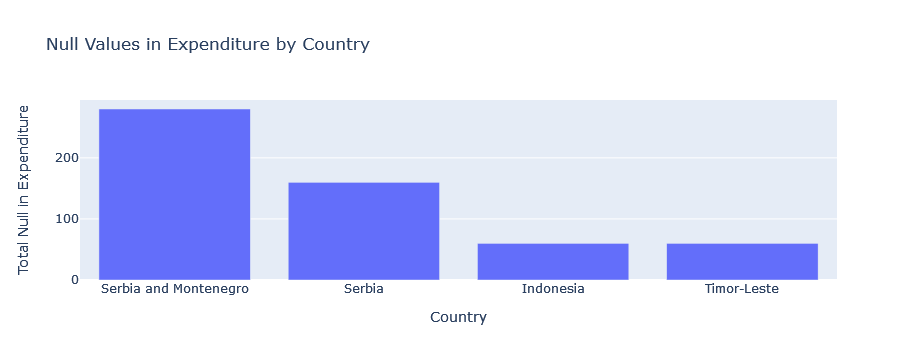

In [273]:
null_values_expenditure_by_country = df[df['Expenditure(million USD)'].isnull()].groupby('Country').size().reset_index(name='Null_Count').sort_values(by='Null_Count', ascending=False)
fig = px.bar(null_values_expenditure_by_country, x='Country', y='Null_Count', title='Null Values in Expenditure by Country')
fig.update_xaxes(title='Country')
fig.update_yaxes(title='Total Null in Expenditure')
fig.show()

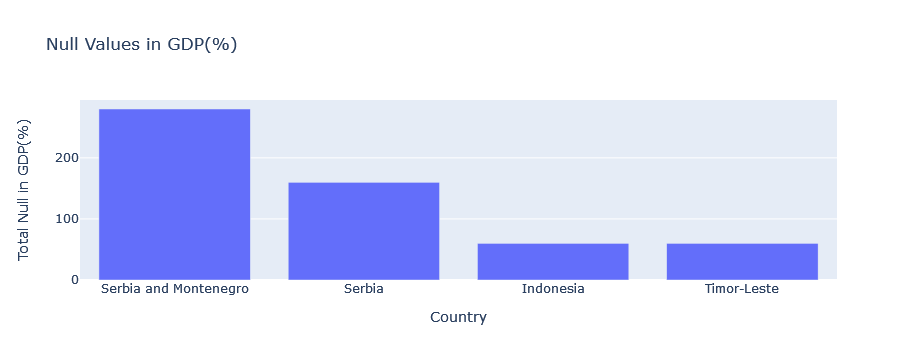

In [274]:
null_values_gdp_by_country = df[df['GDP(%)'].isna()].groupby('Country').size().reset_index(name='Null_Count').sort_values(by='Null_Count', ascending=False)
fig = px.bar(null_values_gdp_by_country, x='Country', y='Null_Count', title='Null Values in GDP(%)')
fig.update_xaxes(title='Country')
fig.update_yaxes(title='Total Null in GDP(%)')
fig.show()

<h5>Null Count in Expenditure and GDP</h5>

| Country              | Null Count |
|----------------------|------------|
| Serbia and Montenegro| 280        |
| Serbia               | 160        |
| Indonesia            | 60         |
| Timor-Leste          | 60         |

<h1>Data Cleaning</h1>

<h5><b>let's start from the largest one first, Serbia and Montenegro</b></h5>

In [275]:
serbia_montenegro = df[df['Country'].isin(['Serbia and Montenegro'])]
serbia_montenegro[serbia_montenegro.notna().all(axis=1)]

Year                Country                            Sector  \
7751  2007  Serbia and Montenegro                    Total function   
7752  2007  Serbia and Montenegro            Environment protection   
7753  2007  Serbia and Montenegro   Housing and community amenities   
7754  2007  Serbia and Montenegro                            Health   
7755  2007  Serbia and Montenegro                         Education   
7756  2007  Serbia and Montenegro                 Social protection   
7757  2007  Serbia and Montenegro           General public services   
7758  2007  Serbia and Montenegro                           Defence   
7759  2007  Serbia and Montenegro           Public order and safety   
7760  2007  Serbia and Montenegro  Recreation, culture and religion   

      Expenditure(million USD)  GDP(%)  
7751                  18,066.6    35.3  
7752                     141.8     0.3  
7753                     792.9     1.5  
7754                   2,612.1     5.1  
7755                   1,682.2     3.3  
7756                   6,286.8    12.3  
7757                   1,690.8     3.3  
7758                   1,007.0     2.0  
7759                   1,118.5     2.2  
7760                     431.7     0.8

In [276]:
serbia_montenegro.describe()

Year  Expenditure(million USD)  GDP(%)
count   290.0                      10.0    10.0
mean  2,014.2                   3,383.1     6.6
std       4.2                   5,447.6    10.6
min   2,007.0                     141.8     0.3
25%   2,011.0                     846.4     1.7
50%   2,014.0                   1,400.4     2.7
75%   2,018.0                   2,381.8     4.7
max   2,021.0                  18,066.6    35.3

<p>Serbia and Montenegro only reported their expenditure details in 2007. Due to the significant null count in the 'Expenditure' and 'GDP' column for Serbia and Montenegro, it was decided to drop the corresponding rows to prevent bias and ensure the integrity of the analysis.</p>

In [277]:
df.drop(serbia_montenegro.index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [278]:
#check to see if it's dropped
df[df['Country'].isin(['Serbia and Montenegro'])]

Empty DataFrame
Columns: [Year, Country, Sector, Expenditure(million USD), GDP(%)]
Index: []

<h5><b>Serbia</b></h5>

In [279]:
serbia = df[df['Country'].isin(['Serbia'])]
serbia[serbia.notna().all(axis=1)]

Year Country                                      Sector  \
8807   2008  Serbia                              Total function   
8808   2008  Serbia                      Environment protection   
8809   2008  Serbia             Housing and community amenities   
8810   2008  Serbia                                      Health   
8811   2008  Serbia                                   Education   
8812   2008  Serbia                           Social protection   
8813   2008  Serbia                     General public services   
8814   2008  Serbia                                     Defence   
8815   2008  Serbia                     Public order and safety   
8816   2008  Serbia            Recreation, culture and religion   
9931   2009  Serbia                              Total function   
9932   2009  Serbia                      Environment protection   
9933   2009  Serbia             Housing and community amenities   
9934   2009  Serbia                                      Health   
9935   2009  Serbia                                   Education   
9936   2009  Serbia                           Social protection   
9937   2009  Serbia                     General public services   
9938   2009  Serbia                                     Defence   
9939   2009  Serbia                     Public order and safety   
9940   2009  Serbia            Recreation, culture and religion   
11068  2010  Serbia                              Total function   
11069  2010  Serbia                      Environment protection   
11070  2010  Serbia             Housing and community amenities   
11071  2010  Serbia                                      Health   
11072  2010  Serbia                                   Education   
11073  2010  Serbia                           Social protection   
11074  2010  Serbia                     General public services   
11075  2010  Serbia                                     Defence   
11076  2010  Serbia                     Public order and safety   
11077  2010  Serbia            Recreation, culture and religion   
12244  2011  Serbia                              Total function   
12245  2011  Serbia  Agriculture, forestry, fishing and hunting   
12246  2011  Serbia      Mining, manufacturing and construction   
12247  2011  Serbia                                   Transport   
12248  2011  Serbia                               Communication   
12249  2011  Serbia                             Fuel and energy   
12250  2011  Serbia                      Environment protection   
12251  2011  Serbia             Housing and community amenities   
12252  2011  Serbia                                      Health   
12253  2011  Serbia                                   Education   
12254  2011  Serbia                           Social protection   
12255  2011  Serbia                     General public services   
12256  2011  Serbia                                     Defence   
12257  2011  Serbia                     Public order and safety   
12258  2011  Serbia            Recreation, culture and religion   
13472  2012  Serbia                              Total function   
13473  2012  Serbia  Agriculture, forestry, fishing and hunting   
13474  2012  Serbia      Mining, manufacturing and construction   
13475  2012  Serbia                                   Transport   
13476  2012  Serbia                               Communication   
13477  2012  Serbia                             Fuel and energy   
13478  2012  Serbia                      Environment protection   
13479  2012  Serbia             Housing and community amenities   
13480  2012  Serbia                                      Health   
13481  2012  Serbia                                   Education   
13482  2012  Serbia                           Social protection   
13483  2012  Serbia                     General public services   
13484  2012  Serbia                                     Defence   
13485  2012  Serbia                     Public order a

In [280]:
pd.set_option('display.max_rows', 60)

In [281]:
#checking serbia data
serbia.describe()

Year  Expenditure(million USD)  GDP(%)
count   220.0                      60.0    60.0
mean  2,005.3                   3,165.3     6.1
std       3.7                   5,475.0    10.5
min   2,000.0                      17.9     0.0
25%   2,002.0                     453.4     0.9
50%   2,005.0                   1,220.1     2.1
75%   2,008.0                   2,278.7     4.4
max   2,012.0                  22,332.1    38.9

In [282]:
#let's try to compare it with other balkans country
albania = df[df['Country'].isin(['Albania'])]
#albania[albania.notna().all(axis=1)]

In [283]:
albania.describe()

Year  Expenditure(million USD)  GDP(%)
count   276.0                     276.0   276.0
mean  2,013.7                     433.2     3.4
std       4.9                     912.7     7.0
min   2,005.0                       0.0     0.0
25%   2,011.0                       6.2     0.0
50%   2,014.0                     105.5     0.8
75%   2,018.0                     373.6     3.1
max   2,021.0                   5,737.2    32.5

<p>Serbia only reported their expenditure details from 2000 to 2012. Due to the significant null count in the 'Expenditure' and 'GDP' column for Serbia, it was decided to drop the corresponding rows to prevent bias and ensure the integrity of the analysis.</p>

In [284]:
df.drop(serbia.index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [285]:
df[df['Country'].isin(['Serbia'])]

Empty DataFrame
Columns: [Year, Country, Sector, Expenditure(million USD), GDP(%)]
Index: []

<h5><b>Indonesia</b></h5>

In [286]:
indonesia = df[df['Country'].isin(['Indonesia'])]
indonesia[indonesia.notna().all(axis=1)]

Year    Country                            Sector  \
8242   2008  Indonesia                    Total function   
8243   2008  Indonesia            Environment protection   
8244   2008  Indonesia   Housing and community amenities   
8245   2008  Indonesia                            Health   
8246   2008  Indonesia                         Education   
...     ...        ...                               ...   
24593  2021  Indonesia                 Social protection   
24594  2021  Indonesia           General public services   
24595  2021  Indonesia                           Defence   
24596  2021  Indonesia           Public order and safety   
24597  2021  Indonesia  Recreation, culture and religion   

       Expenditure(million USD)  GDP(%)  
8242                  108,259.0    19.9  
8243                    1,527.3     0.3  
8244                    9,242.2     1.7  
8245                    6,386.4     1.2  
8246                   12,359.7     2.3  
...                         ...     ...  
24593                  20,477.5     1.7  
24594                  65,133.7     5.5  
24595                   8,792.1     0.7  
24596                  12,443.5     1.0  
24597                   1,478.3     0.1  

[140 rows x 5 columns]

In [287]:
indonesia[indonesia['Expenditure(million USD)'].isnull()]

Year    Country                                           Sector  \
301   2000  Indonesia                                   Total function   
302   2000  Indonesia       Agriculture, forestry, fishing and hunting   
303   2000  Indonesia           Mining, manufacturing and construction   
304   2000  Indonesia                                        Transport   
305   2000  Indonesia                                    Communication   
306   2000  Indonesia                                  Fuel and energy   
307   2000  Indonesia                           Environment protection   
308   2000  Indonesia                  Housing and community amenities   
309   2000  Indonesia                                           Health   
310   2000  Indonesia                                        Education   
311   2000  Indonesia                                Social protection   
312   2000  Indonesia                          General public services   
313   2000  Indonesia                                          Defence   
314   2000  Indonesia                          Public order and safety   
315   2000  Indonesia                 Recreation, culture and religion   
316   2000  Indonesia  General economic, commercial and labour affairs   
317   2000  Indonesia                                 Other industries   
318   2000  Indonesia                           RandD Economic affairs   
319   2000  Indonesia                          Economic affairs n.e.c.   
320   2000  Indonesia                                           Others   
1093  2001  Indonesia                                   Total function   
1094  2001  Indonesia       Agriculture, forestry, fishing and hunting   
1095  2001  Indonesia           Mining, manufacturing and construction   
1096  2001  Indonesia                                        Transport   
1097  2001  Indonesia                                    Communication   
1098  2001  Indonesia                                  Fuel and energy   
1099  2001  Indonesia                           Environment protection   
1100  2001  Indonesia                  Housing and community amenities   
1101  2001  Indonesia                                           Health   
1102  2001  Indonesia                                        Education   
1103  2001  Indonesia                                Social protection   
1104  2001  Indonesia                          General public services   
1105  2001  Indonesia                                          Defence   
1106  2001  Indonesia                          Public order and safety   
1107  2001  Indonesia                 Recreation, culture and religion   
1108  2001  Indonesia  General economic, commercial and labour affairs   
1109  2001  Indonesia                                 Other industries   
1110  2001  Indonesia                           RandD Economic affairs   
1111  2001  Indonesia                          Economic affairs n.e.c.   
1112  2001  Indonesia                                           Others   
2031  2002  Indonesia                                   Total function   
2032  2002  Indonesia       Agriculture, forestry, fishing and hunting   
2033  2002  Indonesia           Mining, manufacturing and construction   
2034  2002  Indonesia                                        Transport   
2035  2002  Indonesia                                    Communication   
2036  2002  Indonesia                                  Fuel and energy   
2037  2002  Indonesia                           Environment protection   
2038  2002  Indonesia                  Housing and community amenities   
2039  2002  Indonesia                                           Health   
2040  2002  Indonesia                                        Education   
2041  2002  Indonesia                                Social protection   
2042  2002  Indonesia                          General public services   
2043  2002  Indonesia                                          Defence   
2044  2002

In [288]:
indonesia[indonesia['GDP(%)'].isnull()]

Year    Country                                           Sector  \
301   2000  Indonesia                                   Total function   
302   2000  Indonesia       Agriculture, forestry, fishing and hunting   
303   2000  Indonesia           Mining, manufacturing and construction   
304   2000  Indonesia                                        Transport   
305   2000  Indonesia                                    Communication   
306   2000  Indonesia                                  Fuel and energy   
307   2000  Indonesia                           Environment protection   
308   2000  Indonesia                  Housing and community amenities   
309   2000  Indonesia                                           Health   
310   2000  Indonesia                                        Education   
311   2000  Indonesia                                Social protection   
312   2000  Indonesia                          General public services   
313   2000  Indonesia                                          Defence   
314   2000  Indonesia                          Public order and safety   
315   2000  Indonesia                 Recreation, culture and religion   
316   2000  Indonesia  General economic, commercial and labour affairs   
317   2000  Indonesia                                 Other industries   
318   2000  Indonesia                           RandD Economic affairs   
319   2000  Indonesia                          Economic affairs n.e.c.   
320   2000  Indonesia                                           Others   
1093  2001  Indonesia                                   Total function   
1094  2001  Indonesia       Agriculture, forestry, fishing and hunting   
1095  2001  Indonesia           Mining, manufacturing and construction   
1096  2001  Indonesia                                        Transport   
1097  2001  Indonesia                                    Communication   
1098  2001  Indonesia                                  Fuel and energy   
1099  2001  Indonesia                           Environment protection   
1100  2001  Indonesia                  Housing and community amenities   
1101  2001  Indonesia                                           Health   
1102  2001  Indonesia                                        Education   
1103  2001  Indonesia                                Social protection   
1104  2001  Indonesia                          General public services   
1105  2001  Indonesia                                          Defence   
1106  2001  Indonesia                          Public order and safety   
1107  2001  Indonesia                 Recreation, culture and religion   
1108  2001  Indonesia  General economic, commercial and labour affairs   
1109  2001  Indonesia                                 Other industries   
1110  2001  Indonesia                           RandD Economic affairs   
1111  2001  Indonesia                          Economic affairs n.e.c.   
1112  2001  Indonesia                                           Others   
2031  2002  Indonesia                                   Total function   
2032  2002  Indonesia       Agriculture, forestry, fishing and hunting   
2033  2002  Indonesia           Mining, manufacturing and construction   
2034  2002  Indonesia                                        Transport   
2035  2002  Indonesia                                    Communication   
2036  2002  Indonesia                                  Fuel and energy   
2037  2002  Indonesia                           Environment protection   
2038  2002  Indonesia                  Housing and community amenities   
2039  2002  Indonesia                                           Health   
2040  2002  Indonesia                                        Education   
2041  2002  Indonesia                                Social protection   
2042  2002  Indonesia                          General public services   
2043  2002  Indonesia                                          Defence   
2044  2002

In [289]:
indonesia.describe()

Year  Expenditure(million USD)  GDP(%)
count   200.0                     140.0   140.0
mean  2,010.5                  30,073.6     3.3
std       7.1                  48,898.4     5.3
min   2,000.0                     524.6     0.1
25%   2,002.0                   2,360.1     0.3
50%   2,011.5                  10,162.9     1.1
75%   2,016.2                  28,066.3     3.0
max   2,021.0                 225,046.7    19.9

Since Indonesia has null values only from the years 2000 to 2002, we can proceed by dropping the rows corresponding to these years from the Indonesia dataset.

In [290]:
#let's filter the indonesia into only ones that has null values
indonesia = indonesia[indonesia['Expenditure(million USD)'].isnull() | indonesia['GDP(%)'].isnull()]
df.drop(indonesia.index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [291]:
df[df['Country'].isin(['Indonesia'])]

Year    Country                            Sector  \
8182   2008  Indonesia                    Total function   
8183   2008  Indonesia            Environment protection   
8184   2008  Indonesia   Housing and community amenities   
8185   2008  Indonesia                            Health   
8186   2008  Indonesia                         Education   
...     ...        ...                               ...   
24533  2021  Indonesia                 Social protection   
24534  2021  Indonesia           General public services   
24535  2021  Indonesia                           Defence   
24536  2021  Indonesia           Public order and safety   
24537  2021  Indonesia  Recreation, culture and religion   

       Expenditure(million USD)  GDP(%)  
8182                  108,259.0    19.9  
8183                    1,527.3     0.3  
8184                    9,242.2     1.7  
8185                    6,386.4     1.2  
8186                   12,359.7     2.3  
...                         ...     ...  
24533                  20,477.5     1.7  
24534                  65,133.7     5.5  
24535                   8,792.1     0.7  
24536                  12,443.5     1.0  
24537                   1,478.3     0.1  

[140 rows x 5 columns]

<h5><b>Timor Leste</b></h5>

In [292]:
tl = df[df['Country'].isin(['Timor-Leste'])]
tl[tl.notna().all(axis=1)]

Year      Country                            Sector  \
10985  2010  Timor-Leste                    Total function   
12151  2011  Timor-Leste                    Total function   
13359  2012  Timor-Leste                    Total function   
13360  2012  Timor-Leste            Environment protection   
13361  2012  Timor-Leste   Housing and community amenities   
13362  2012  Timor-Leste                            Health   
13363  2012  Timor-Leste                         Education   
13364  2012  Timor-Leste                 Social protection   
13365  2012  Timor-Leste           General public services   
13366  2012  Timor-Leste                           Defence   
13367  2012  Timor-Leste           Public order and safety   
13368  2012  Timor-Leste  Recreation, culture and religion   
14647  2013  Timor-Leste                    Total function   

       Expenditure(million USD)  GDP(%)  
10985                   1,020.2   115.7  
12151                   1,369.5   131.4  
13359                   1,456.4   125.5  
13360                       2.4     0.2  
13361                      20.1     1.7  
13362                      53.3     4.6  
13363                     109.0     9.4  
13364                     160.5    13.8  
13365                     178.2    15.4  
13366                      39.9     3.4  
13367                      49.0     4.2  
13368                       9.8     0.8  
14647                   1,235.8    88.6

In [293]:
tl[tl['Expenditure(million USD)'].isnull()]

Year      Country                                           Sector  \
696   2000  Timor-Leste                                   Total function   
697   2000  Timor-Leste       Agriculture, forestry, fishing and hunting   
698   2000  Timor-Leste           Mining, manufacturing and construction   
699   2000  Timor-Leste                                        Transport   
700   2000  Timor-Leste                                    Communication   
701   2000  Timor-Leste                                  Fuel and energy   
702   2000  Timor-Leste                           Environment protection   
703   2000  Timor-Leste                  Housing and community amenities   
704   2000  Timor-Leste                                           Health   
705   2000  Timor-Leste                                        Education   
706   2000  Timor-Leste                                Social protection   
707   2000  Timor-Leste                          General public services   
708   2000  Timor-Leste                                          Defence   
709   2000  Timor-Leste                          Public order and safety   
710   2000  Timor-Leste                 Recreation, culture and religion   
711   2000  Timor-Leste  General economic, commercial and labour affairs   
712   2000  Timor-Leste                                 Other industries   
713   2000  Timor-Leste                           RandD Economic affairs   
714   2000  Timor-Leste                          Economic affairs n.e.c.   
715   2000  Timor-Leste                                           Others   
1541  2001  Timor-Leste                                   Total function   
1542  2001  Timor-Leste       Agriculture, forestry, fishing and hunting   
1543  2001  Timor-Leste           Mining, manufacturing and construction   
1544  2001  Timor-Leste                                        Transport   
1545  2001  Timor-Leste                                    Communication   
1546  2001  Timor-Leste                                  Fuel and energy   
1547  2001  Timor-Leste                           Environment protection   
1548  2001  Timor-Leste                  Housing and community amenities   
1549  2001  Timor-Leste                                           Health   
1550  2001  Timor-Leste                                        Education   
1551  2001  Timor-Leste                                Social protection   
1552  2001  Timor-Leste                          General public services   
1553  2001  Timor-Leste                                          Defence   
1554  2001  Timor-Leste                          Public order and safety   
1555  2001  Timor-Leste                 Recreation, culture and religion   
1556  2001  Timor-Leste  General economic, commercial and labour affairs   
1557  2001  Timor-Leste                                 Other industries   
1558  2001  Timor-Leste                           RandD Economic affairs   
1559  2001  Timor-Leste                          Economic affairs n.e.c.   
1560  2001  Timor-Leste                                           Others   
2518  2002  Timor-Leste                                   Total function   
2519  2002  Timor-Leste       Agriculture, forestry, fishing and hunting   
2520  2002  Timor-Leste           Mining, manufacturing and construction   
2521  2002  Timor-Leste                                        Transport   
2522  2002  Timor-Leste                                    Communication   
2523  2002  Timor-Leste                                  Fuel and energy   
2524  2002  Timor-Leste                           Environment protection   
2525  2002  Timor-Leste                  Housing and community amenities   
2526  2002  Timor-Leste                                           Health   
2527  2002  Timor-Leste                                        Education   
2528  2002  Timor-Leste                                Social protection   
2529  2002  Timor-Leste                          Gener

In [294]:
tl[tl['GDP(%)'].isnull()]

Year      Country                                           Sector  \
696   2000  Timor-Leste                                   Total function   
697   2000  Timor-Leste       Agriculture, forestry, fishing and hunting   
698   2000  Timor-Leste           Mining, manufacturing and construction   
699   2000  Timor-Leste                                        Transport   
700   2000  Timor-Leste                                    Communication   
701   2000  Timor-Leste                                  Fuel and energy   
702   2000  Timor-Leste                           Environment protection   
703   2000  Timor-Leste                  Housing and community amenities   
704   2000  Timor-Leste                                           Health   
705   2000  Timor-Leste                                        Education   
706   2000  Timor-Leste                                Social protection   
707   2000  Timor-Leste                          General public services   
708   2000  Timor-Leste                                          Defence   
709   2000  Timor-Leste                          Public order and safety   
710   2000  Timor-Leste                 Recreation, culture and religion   
711   2000  Timor-Leste  General economic, commercial and labour affairs   
712   2000  Timor-Leste                                 Other industries   
713   2000  Timor-Leste                           RandD Economic affairs   
714   2000  Timor-Leste                          Economic affairs n.e.c.   
715   2000  Timor-Leste                                           Others   
1541  2001  Timor-Leste                                   Total function   
1542  2001  Timor-Leste       Agriculture, forestry, fishing and hunting   
1543  2001  Timor-Leste           Mining, manufacturing and construction   
1544  2001  Timor-Leste                                        Transport   
1545  2001  Timor-Leste                                    Communication   
1546  2001  Timor-Leste                                  Fuel and energy   
1547  2001  Timor-Leste                           Environment protection   
1548  2001  Timor-Leste                  Housing and community amenities   
1549  2001  Timor-Leste                                           Health   
1550  2001  Timor-Leste                                        Education   
1551  2001  Timor-Leste                                Social protection   
1552  2001  Timor-Leste                          General public services   
1553  2001  Timor-Leste                                          Defence   
1554  2001  Timor-Leste                          Public order and safety   
1555  2001  Timor-Leste                 Recreation, culture and religion   
1556  2001  Timor-Leste  General economic, commercial and labour affairs   
1557  2001  Timor-Leste                                 Other industries   
1558  2001  Timor-Leste                           RandD Economic affairs   
1559  2001  Timor-Leste                          Economic affairs n.e.c.   
1560  2001  Timor-Leste                                           Others   
2518  2002  Timor-Leste                                   Total function   
2519  2002  Timor-Leste       Agriculture, forestry, fishing and hunting   
2520  2002  Timor-Leste           Mining, manufacturing and construction   
2521  2002  Timor-Leste                                        Transport   
2522  2002  Timor-Leste                                    Communication   
2523  2002  Timor-Leste                                  Fuel and energy   
2524  2002  Timor-Leste                           Environment protection   
2525  2002  Timor-Leste                  Housing and community amenities   
2526  2002  Timor-Leste                                           Health   
2527  2002  Timor-Leste                                        Education   
2528  2002  Timor-Leste                                Social protection   
2529  2002  Timor-Leste                          Gener

Since Timor Leste only has null values from the years 2000 to 2002, we can proceed by dropping the rows corresponding to these years from the dataset.

In [295]:
tl = tl[tl['Expenditure(million USD)'].isnull() | tl['GDP(%)'].isnull()]
tl

Year      Country                                           Sector  \
696   2000  Timor-Leste                                   Total function   
697   2000  Timor-Leste       Agriculture, forestry, fishing and hunting   
698   2000  Timor-Leste           Mining, manufacturing and construction   
699   2000  Timor-Leste                                        Transport   
700   2000  Timor-Leste                                    Communication   
701   2000  Timor-Leste                                  Fuel and energy   
702   2000  Timor-Leste                           Environment protection   
703   2000  Timor-Leste                  Housing and community amenities   
704   2000  Timor-Leste                                           Health   
705   2000  Timor-Leste                                        Education   
706   2000  Timor-Leste                                Social protection   
707   2000  Timor-Leste                          General public services   
708   2000  Timor-Leste                                          Defence   
709   2000  Timor-Leste                          Public order and safety   
710   2000  Timor-Leste                 Recreation, culture and religion   
711   2000  Timor-Leste  General economic, commercial and labour affairs   
712   2000  Timor-Leste                                 Other industries   
713   2000  Timor-Leste                           RandD Economic affairs   
714   2000  Timor-Leste                          Economic affairs n.e.c.   
715   2000  Timor-Leste                                           Others   
1541  2001  Timor-Leste                                   Total function   
1542  2001  Timor-Leste       Agriculture, forestry, fishing and hunting   
1543  2001  Timor-Leste           Mining, manufacturing and construction   
1544  2001  Timor-Leste                                        Transport   
1545  2001  Timor-Leste                                    Communication   
1546  2001  Timor-Leste                                  Fuel and energy   
1547  2001  Timor-Leste                           Environment protection   
1548  2001  Timor-Leste                  Housing and community amenities   
1549  2001  Timor-Leste                                           Health   
1550  2001  Timor-Leste                                        Education   
1551  2001  Timor-Leste                                Social protection   
1552  2001  Timor-Leste                          General public services   
1553  2001  Timor-Leste                                          Defence   
1554  2001  Timor-Leste                          Public order and safety   
1555  2001  Timor-Leste                 Recreation, culture and religion   
1556  2001  Timor-Leste  General economic, commercial and labour affairs   
1557  2001  Timor-Leste                                 Other industries   
1558  2001  Timor-Leste                           RandD Economic affairs   
1559  2001  Timor-Leste                          Economic affairs n.e.c.   
1560  2001  Timor-Leste                                           Others   
2518  2002  Timor-Leste                                   Total function   
2519  2002  Timor-Leste       Agriculture, forestry, fishing and hunting   
2520  2002  Timor-Leste           Mining, manufacturing and construction   
2521  2002  Timor-Leste                                        Transport   
2522  2002  Timor-Leste                                    Communication   
2523  2002  Timor-Leste                                  Fuel and energy   
2524  2002  Timor-Leste                           Environment protection   
2525  2002  Timor-Leste                  Housing and community amenities   
2526  2002  Timor-Leste                                           Health   
2527  2002  Timor-Leste                                        Education   
2528  2002  Timor-Leste                                Social protection   
2529  2002  Timor-Leste                          Gener

In [296]:
df.drop(tl.index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [297]:
df[df['Country'].isin(['Timor-Leste'])]

Year      Country                            Sector  \
10925  2010  Timor-Leste                    Total function   
12091  2011  Timor-Leste                    Total function   
13299  2012  Timor-Leste                    Total function   
13300  2012  Timor-Leste            Environment protection   
13301  2012  Timor-Leste   Housing and community amenities   
13302  2012  Timor-Leste                            Health   
13303  2012  Timor-Leste                         Education   
13304  2012  Timor-Leste                 Social protection   
13305  2012  Timor-Leste           General public services   
13306  2012  Timor-Leste                           Defence   
13307  2012  Timor-Leste           Public order and safety   
13308  2012  Timor-Leste  Recreation, culture and religion   
14587  2013  Timor-Leste                    Total function   

       Expenditure(million USD)  GDP(%)  
10925                   1,020.2   115.7  
12091                   1,369.5   131.4  
13299                   1,456.4   125.5  
13300                       2.4     0.2  
13301                      20.1     1.7  
13302                      53.3     4.6  
13303                     109.0     9.4  
13304                     160.5    13.8  
13305                     178.2    15.4  
13306                      39.9     3.4  
13307                      49.0     4.2  
13308                       9.8     0.8  
14587                   1,235.8    88.6

In [298]:
df.isna().sum()

Year                        0
Country                     0
Sector                      0
Expenditure(million USD)    0
GDP(%)                      0
dtype: int64

<h5><b>Saving the cleaned dataset</b></h5>

In [299]:
df.to_csv(r"D:\nevinphilbert\Portfolio\Python Builder\World Expenditure Analysis\WorldExpendituresCleaned.csv", index=False)

<h1>Exploratory Data Analysis</h1>

In [300]:
df_groupby_country = df.groupby('Country').agg({
    'Year': 'nunique',  # Count the number of years for each country (optional)
    'Expenditure(million USD)': 'sum',  # Sum of expenditure for each country
    'GDP(%)': 'mean'  # Mean GDP percentage for each country
})
df_groupby_country

Year  Expenditure(million USD)  GDP(%)
Country                                                         
Afghanistan                 12                 234,106.4     8.9
Albania                     16                 119,566.7     3.4
Armenia                     18                  70,173.2     5.3
Australia                   22              19,186,833.5     4.1
Austria                     22               8,415,252.2     5.4
...                        ...                       ...     ...
United Kingdom              22              48,771,125.2     4.5
United States of America    22             262,767,216.9     7.4
Uzbekistan                   8                 210,002.7     4.7
Vanuatu                      8                   2,854.1     4.3
Yemen                       11                 145,107.0     5.4

[94 rows x 3 columns]

In [301]:
country = df_groupby_country[df_groupby_country['Year'] >= 22].reset_index()
country

Country  Year  Expenditure(million USD)  GDP(%)
0                      Australia    22              19,186,833.5     4.1
1                        Austria    22               8,415,252.2     5.4
2                        Belgium    22              10,479,205.7     5.7
3                       Bulgaria    22                 781,113.2     4.3
4               China, Macao SAR    22                 222,220.0     3.5
5                        Croatia    22                 146,074.6     0.7
6                         Cyprus    22                 384,936.2     4.2
7                        Czechia    22               3,474,116.3     4.5
8                        Denmark    22               7,017,374.9     5.6
9                        Estonia    22                 358,935.5     4.1
10                       Finland    22               5,437,278.4     5.6
11                        France    22              59,595,346.9     5.8
12                       Georgia    22                 158,672.3     3.0
13                       Germany    22              66,943,414.4     4.9
14                        Greece    22               5,203,960.6     5.5
15                       Hungary    22               2,694,926.2     5.1
16                       Iceland    22                 357,833.2     5.1
17                       Ireland    22               3,870,339.6     3.7
18                        Israel    22               4,591,501.6     6.4
19                         Italy    22              41,697,664.6     5.3
20                        Latvia    22                 430,275.0     4.0
21                     Lithuania    22                 624,174.8     3.9
22                    Luxembourg    22                 978,594.7     4.4
23                      Maldives    22                  42,841.5     4.8
24                         Malta    22                 171,200.2     4.3
25                      Mongolia    22                 101,089.4     6.2
26  Netherlands (Kingdom of the)    22              15,376,730.6     4.7
27                        Norway    22               7,661,488.3     4.9
28                   Philippines    22               1,608,754.6     3.6
29                        Poland    22               8,359,999.6     4.7
30                      Portugal    22               4,352,766.7     5.2
31                       Romania    22               2,635,245.1     3.9
32            Russian Federation    22              20,890,865.8     4.6
33                     Singapore    22               1,722,179.7     2.2
34                      Slovakia    22               1,507,006.4     5.1
35                      Slovenia    22                 918,957.1     5.0
36                  South Africa    22               5,226,966.0     4.3
37                         Spain    22              23,584,949.6     4.5
38                        Sweden    22              10,530,089.5     5.5
39    Switzerland, Liechtenstein    22               8,443,918.7     3.5
40                      Thailand    22               2,498,749.2     3.7
41                United Kingdom    22              48,771,125.2     4.5
42      United States of America    22             262,767,216.9     7.4

In [302]:
country_cons = country['Country'].values
country_cons

array(['Australia', 'Austria', 'Belgium', 'Bulgaria', 'China, Macao SAR',
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland',
       'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Maldives', 'Malta', 'Mongolia', 'Netherlands (Kingdom of the)',
       'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania',
       'Russian Federation', 'Singapore', 'Slovakia', 'Slovenia',
       'South Africa', 'Spain', 'Sweden', 'Switzerland, Liechtenstein',
       'Thailand', 'United Kingdom', 'United States of America'],
      dtype=object)

In [303]:
df_use = df[df['Country'].isin(country_cons)]
df_use.reset_index(drop=True, inplace=True)
df_use

Year                   Country  \
0      2000                 Australia   
1      2000                 Australia   
2      2000                 Australia   
3      2000                 Australia   
4      2000                 Australia   
...     ...                       ...   
16249  2021  United States of America   
16250  2021  United States of America   
16251  2021  United States of America   
16252  2021  United States of America   
16253  2021  United States of America   

                                           Sector  Expenditure(million USD)  \
0                                  Total function                 153,122.6   
1      Agriculture, forestry, fishing and hunting                   2,195.6   
2          Mining, manufacturing and construction                     905.0   
3                                       Transport                  11,417.4   
4                                 Fuel and energy                   2,251.2   
...                                           ...                       ...   
16249                           Social protection               2,827,585.1   
16250                     General public services               1,291,640.2   
16251                                     Defence                 759,322.0   
16252                     Public order and safety                 459,973.2   
16253            Recreation, culture and religion                  62,528.8   

       GDP(%)  
0        37.4  
1         0.5  
2         0.2  
3         2.8  
4         0.5  
...       ...  
16249    12.1  
16250     5.5  
16251     3.2  
16252     2.0  
16253     0.3  

[16254 rows x 5 columns]

In [304]:
df_use.describe()

Year  Expenditure(million USD)   GDP(%)
count 16,254.0                  16,254.0 16,254.0
mean   2,010.7                  41,234.3      4.6
std        6.3                 279,288.3      9.9
min    2,000.0                       0.0      0.0
25%    2,005.0                     209.5      0.2
50%    2,011.0                   1,521.8      1.0
75%    2,016.0                  10,251.4      4.0
max    2,021.0              10,476,081.8     74.5

<h5><b>Doing some cleaning over sector, removing total function as it is the combination of the other 19 sectors and it is easier to drop rows that has it instead of excluding it for every analysis</b></h5>

In [305]:
unique = df_use['Sector'].unique()
df_unique = pd.DataFrame({'Sector': unique})
df_unique

Sector
0                                    Total function
1        Agriculture, forestry, fishing and hunting
2            Mining, manufacturing and construction
3                                         Transport
4                                   Fuel and energy
5                            Environment protection
6                   Housing and community amenities
7                                            Health
8                                         Education
9                                 Social protection
10                          General public services
11                                          Defence
12                          Public order and safety
13                 Recreation, culture and religion
14  General economic, commercial and labour affairs
15                                 Other industries
16                           RandD Economic affairs
17                          Economic affairs n.e.c.
18                                    Communication
19                                           Others

In [306]:
df_unique = df_unique[df_unique['Sector'] != 'Total function']
df_unique.reset_index(drop=True, inplace=True)
df_unique

Sector
0        Agriculture, forestry, fishing and hunting
1            Mining, manufacturing and construction
2                                         Transport
3                                   Fuel and energy
4                            Environment protection
5                   Housing and community amenities
6                                            Health
7                                         Education
8                                 Social protection
9                           General public services
10                                          Defence
11                          Public order and safety
12                 Recreation, culture and religion
13  General economic, commercial and labour affairs
14                                 Other industries
15                           RandD Economic affairs
16                          Economic affairs n.e.c.
17                                    Communication
18                                           Others

In [307]:
df_use = df_use[df_use['Sector'] != 'Total function']
df_use.reset_index(drop=True, inplace=True)
df_use

Year                   Country  \
0      2000                 Australia   
1      2000                 Australia   
2      2000                 Australia   
3      2000                 Australia   
4      2000                 Australia   
...     ...                       ...   
15303  2021  United States of America   
15304  2021  United States of America   
15305  2021  United States of America   
15306  2021  United States of America   
15307  2021  United States of America   

                                           Sector  Expenditure(million USD)  \
0      Agriculture, forestry, fishing and hunting                   2,195.6   
1          Mining, manufacturing and construction                     905.0   
2                                       Transport                  11,417.4   
3                                 Fuel and energy                   2,251.2   
4                          Environment protection                   2,051.8   
...                                           ...                       ...   
15303                           Social protection               2,827,585.1   
15304                     General public services               1,291,640.2   
15305                                     Defence                 759,322.0   
15306                     Public order and safety                 459,973.2   
15307            Recreation, culture and religion                  62,528.8   

       GDP(%)  
0         0.5  
1         0.2  
2         2.8  
3         0.5  
4         0.5  
...       ...  
15303    12.1  
15304     5.5  
15305     3.2  
15306     2.0  
15307     0.3  

[15308 rows x 5 columns]

In [308]:
df = df_use
df

Year                   Country  \
0      2000                 Australia   
1      2000                 Australia   
2      2000                 Australia   
3      2000                 Australia   
4      2000                 Australia   
...     ...                       ...   
15303  2021  United States of America   
15304  2021  United States of America   
15305  2021  United States of America   
15306  2021  United States of America   
15307  2021  United States of America   

                                           Sector  Expenditure(million USD)  \
0      Agriculture, forestry, fishing and hunting                   2,195.6   
1          Mining, manufacturing and construction                     905.0   
2                                       Transport                  11,417.4   
3                                 Fuel and energy                   2,251.2   
4                          Environment protection                   2,051.8   
...                                           ...                       ...   
15303                           Social protection               2,827,585.1   
15304                     General public services               1,291,640.2   
15305                                     Defence                 759,322.0   
15306                     Public order and safety                 459,973.2   
15307            Recreation, culture and religion                  62,528.8   

       GDP(%)  
0         0.5  
1         0.2  
2         2.8  
3         0.5  
4         0.5  
...       ...  
15303    12.1  
15304     5.5  
15305     3.2  
15306     2.0  
15307     0.3  

[15308 rows x 5 columns]

In [309]:
df.describe()

Year  Expenditure(million USD)   GDP(%)
count 15,308.0                  15,308.0 15,308.0
mean   2,010.7                  21,362.4      2.4
std        6.3                 106,713.1      3.8
min    2,000.0                       0.0      0.0
25%    2,005.0                     184.1      0.2
50%    2,011.0                   1,222.9      0.9
75%    2,016.0                   7,541.6      2.8
max    2,021.0               2,827,585.1     27.1

<h5><b>Now we can do our EDA with more ease</b></h5>

In [310]:
df['Expenditure(million USD)'].describe()

count      15,308.0
mean       21,362.4
std       106,713.1
min             0.0
25%           184.1
50%         1,222.9
75%         7,541.6
max     2,827,585.1
Name: Expenditure(million USD), dtype: float64

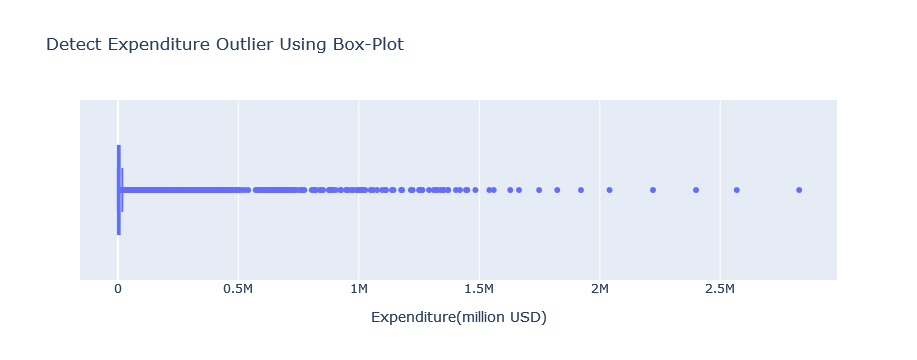

In [311]:
fig = px.box(df, x="Expenditure(million USD)", title="Detect Expenditure Outlier Using Box-Plot")
fig.show()

this is interesting, i want to see who and what kind of stuff they're doing with that much fund

In [312]:
pd.set_option('display.max_rows', None)
df[df['Expenditure(million USD)'] >= 500000].sort_values(by='Expenditure(million USD)', ascending=False).reset_index().head(10)

index  Year                   Country             Sector  \
0  15303  2021  United States of America  Social protection   
1  14600  2020  United States of America  Social protection   
2  15301  2021  United States of America             Health   
3  14598  2020  United States of America             Health   
4  13874  2019  United States of America             Health   
5  13151  2018  United States of America             Health   
6  12425  2017  United States of America             Health   
7  11705  2016  United States of America             Health   
8  10985  2015  United States of America             Health   
9  13876  2019  United States of America  Social protection   

   Expenditure(million USD)  GDP(%)  
0               2,827,585.1    12.1  
1               2,568,403.2    12.1  
2               2,399,530.2    10.2  
3               2,221,081.4    10.5  
4               2,040,519.4     9.5  
5               1,921,968.3     9.3  
6               1,823,545.6     9.3  
7               1,748,282.3     9.3  
8               1,664,821.3     9.1  
9               1,628,513.9     7.6

In [313]:
df['GDP(%)'].describe()

count   15,308.0
mean         2.4
std          3.8
min          0.0
25%          0.2
50%          0.9
75%          2.8
max         27.1
Name: GDP(%), dtype: float64

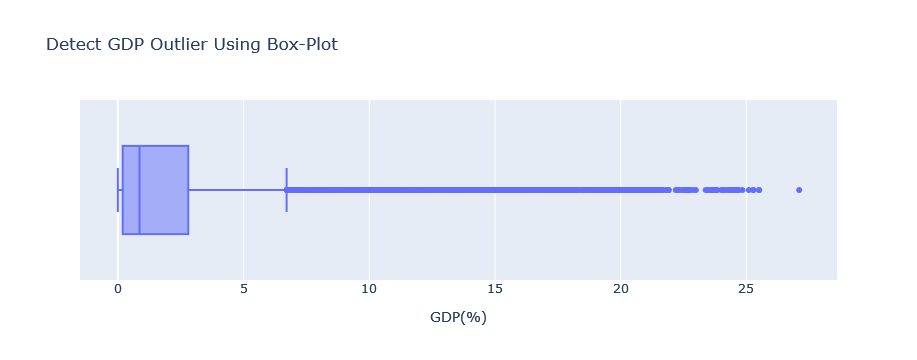

In [314]:
fig = px.box(df, x="GDP(%)", title="Detect GDP Outlier Using Box-Plot")
fig.show()

In [315]:
df[df['GDP(%)'] >= 6.7].sort_values(by='GDP(%)', ascending=False).reset_index().head(10)

index  Year  Country             Sector  Expenditure(million USD)  GDP(%)
0  14079  2020   France  Social protection                 716,872.0    27.1
1  14061  2020  Finland  Social protection                  69,343.9    25.5
2  11170  2016  Finland  Social protection                  61,351.2    25.5
3  10444  2015  Finland  Social protection                  59,262.4    25.3
4   9721  2014  Finland  Social protection                  69,326.5    25.3
5  14221  2020    Italy  Social protection                 475,917.7    25.1
6   6906  2010  Denmark  Social protection                  79,972.4    24.8
7   7596  2011  Denmark  Social protection                  84,943.7    24.7
8  14802  2021   France  Social protection                 732,100.9    24.7
9  14784  2021  Finland  Social protection                  73,300.3    24.7

In [316]:
df['Sector'].unique()

array(['Agriculture, forestry, fishing and hunting',
       'Mining, manufacturing and construction', 'Transport',
       'Fuel and energy', 'Environment protection',
       'Housing and community amenities', 'Health', 'Education',
       'Social protection', 'General public services', 'Defence',
       'Public order and safety', 'Recreation, culture and religion',
       'General economic, commercial and labour affairs',
       'Other industries', 'RandD Economic affairs',
       'Economic affairs n.e.c.', 'Communication', 'Others'], dtype=object)

In [317]:
df_groupby = df.groupby(['Year', 'Country']).agg({'Expenditure(million USD)': 'sum', 'GDP(%)': 'mean'})
df_groupby.reset_index(inplace = True)
df_groupby.head()

Year           Country  Expenditure(million USD)  GDP(%)
0  2000         Australia                 153,596.3     2.2
1  2000           Austria                 100,682.8     2.8
2  2000           Belgium                 105,549.9     5.0
3  2000          Bulgaria                   5,693.4     2.7
4  2000  China, Macao SAR                   1,019.4     1.7

<h3><b>Exploring Data to get some overview with visualization</b></h3>

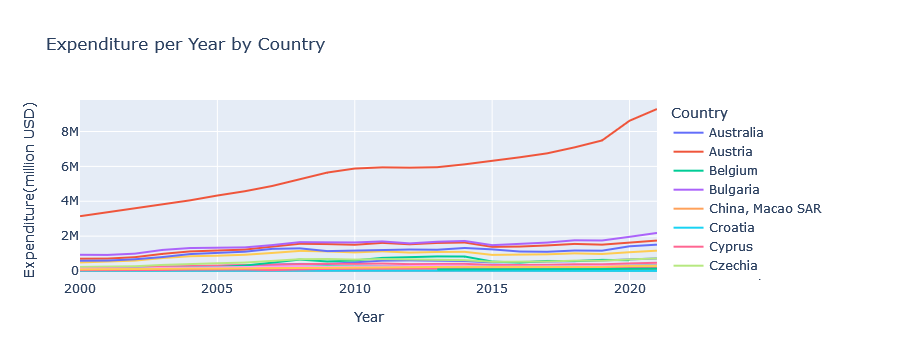

In [318]:
total_expenditure_per_year = df_groupby.groupby(['Year', 'Country'])['Expenditure(million USD)'].sum().reset_index()
fig = px.line(total_expenditure_per_year, x='Year', y='Expenditure(million USD)', color='Country', title='Expenditure per Year by Country')
fig.show()

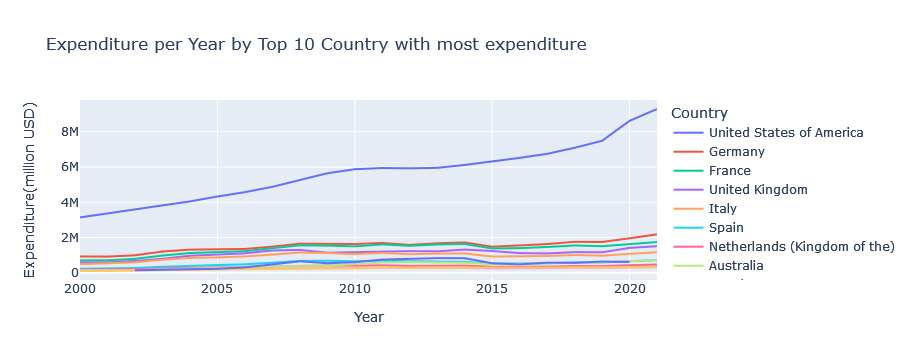

In [319]:
top_10_countries_per_year = total_expenditure_per_year.groupby('Year').apply(lambda x: x.nlargest(10, 'Expenditure(million USD)')).reset_index(drop=True)
fig = px.line(top_10_countries_per_year, x='Year', y='Expenditure(million USD)', color='Country', title='Expenditure per Year by Top 10 Country with most expenditure')
fig.show()

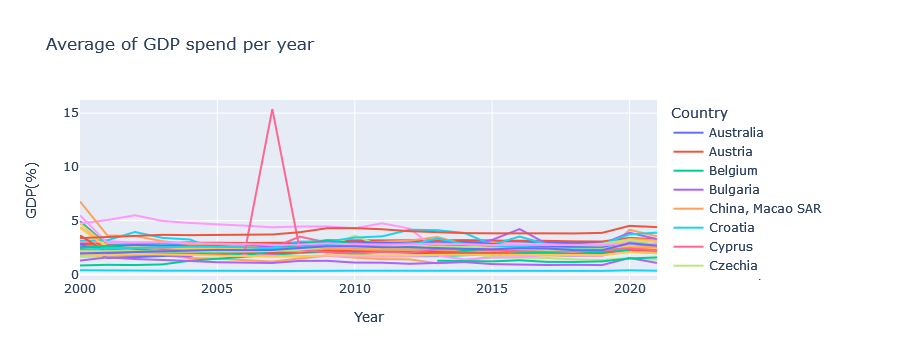

In [361]:
mean_gdp_per_year = df_groupby.groupby(['Year', 'Country'])['GDP(%)'].mean().reset_index()
fig = px.line(mean_gdp_per_year, x='Year', y='GDP(%)', color='Country', title='Average of GDP spend per year')
fig.show()

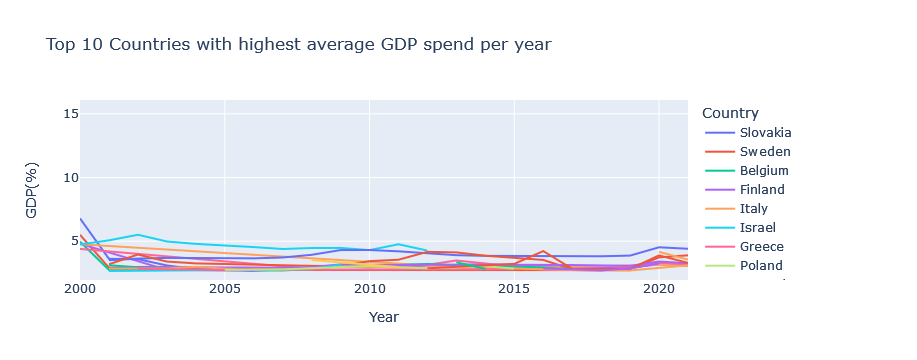

In [362]:
top_10_countries_gdp_per_year = mean_gdp_per_year.groupby('Year').apply(lambda x: x.nlargest(10, 'GDP(%)')).reset_index(drop=True)
fig = px.line(top_10_countries_gdp_per_year, x='Year', y='GDP(%)', color='Country', title='Top 10 Countries with highest average GDP spend per year')
fig.show()

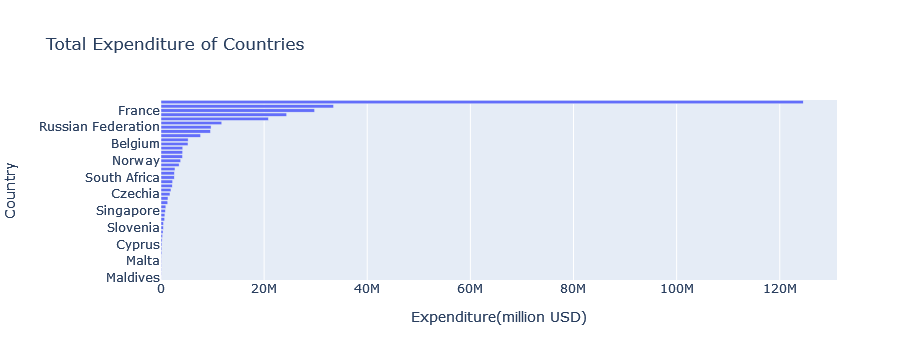

In [320]:
total_expenditure = df_groupby.groupby('Country').sum().reset_index().sort_values(by='Expenditure(million USD)', ascending=True)
fig = px.bar(total_expenditure, x='Expenditure(million USD)', y='Country', orientation='h', title='Total Expenditure of Countries')
fig.show()

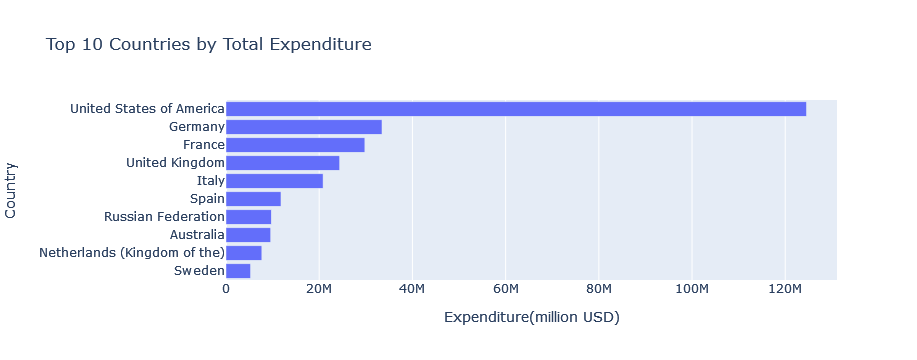

In [374]:
top_10_countries_expenditure = total_expenditure.nlargest(10, 'Expenditure(million USD)').sort_values(by='Expenditure(million USD)', ascending=True)
fig = px.bar(top_10_countries_expenditure, x='Expenditure(million USD)', y='Country', orientation='h', title='Top 10 Countries by Total Expenditure')
fig.show()

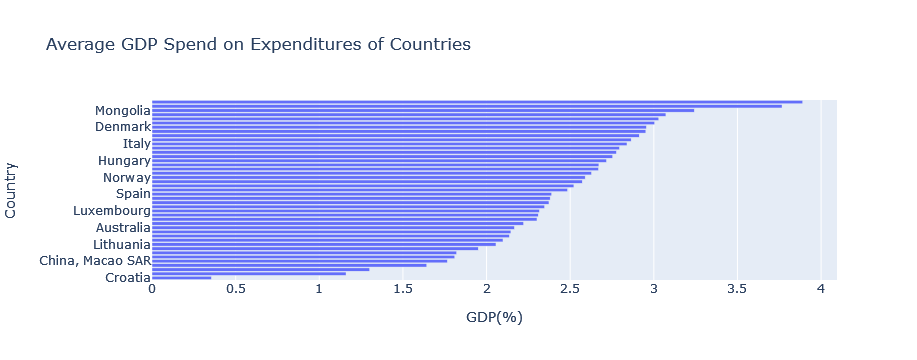

In [378]:
average_gdp = df_groupby.groupby('Country').mean().reset_index().sort_values(by='GDP(%)', ascending=True)
fig = px.bar(average_gdp, x='GDP(%)', y='Country', orientation='h', title='Average GDP Spend on Expenditures of Countries')
fig.show()

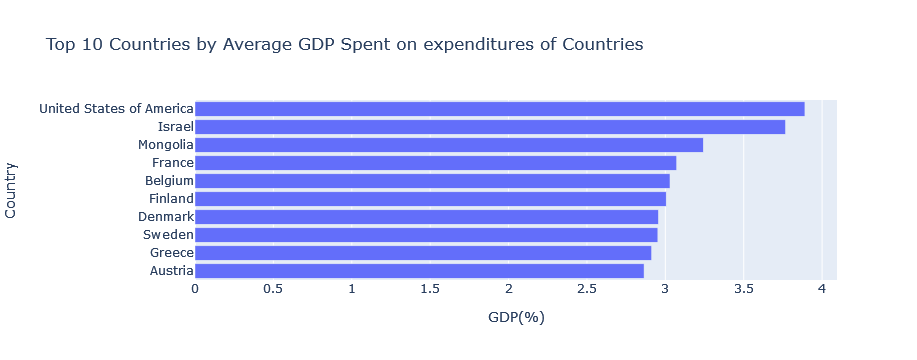

In [376]:
top_10_countries_average_gdp = average_gdp.nlargest(10, 'GDP(%)').sort_values(by='GDP(%)', ascending=True)
fig = px.bar(top_10_countries, x='GDP(%)', y='Country', orientation='h', title='Top 10 Countries by Average GDP Spent on expenditures of Countries')
fig.show()

In [415]:
df.head()

Year    Country                                      Sector  \
0  2000  Australia  Agriculture, forestry, fishing and hunting   
1  2000  Australia      Mining, manufacturing and construction   
2  2000  Australia                                   Transport   
3  2000  Australia                             Fuel and energy   
4  2000  Australia                      Environment protection   

   Expenditure(million USD)  GDP(%)  
0                   2,195.6     0.5  
1                     905.0     0.2  
2                  11,417.4     2.8  
3                   2,251.2     0.5  
4                   2,051.8     0.5

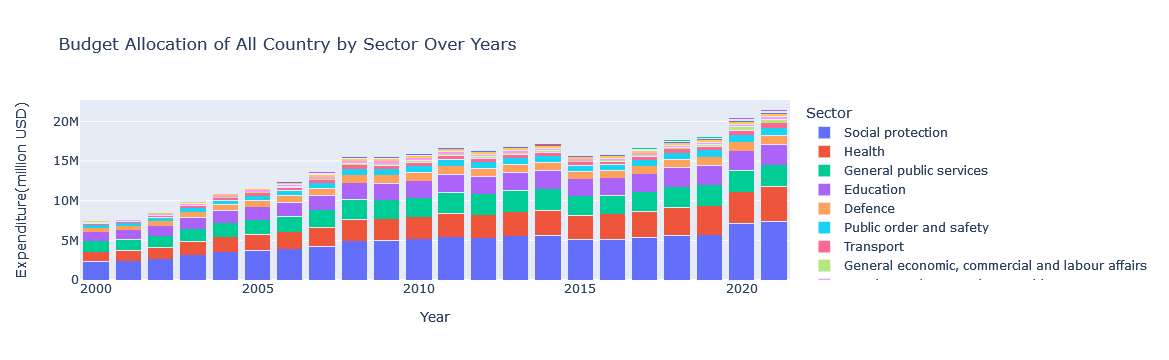

In [416]:
budget_allocation_per_year = df.groupby(['Year', 'Sector']).agg({'Expenditure(million USD)': 'sum'}).reset_index().sort_values(by='Expenditure(million USD)', ascending=False)
fig = px.bar(budget_allocation_per_year, x='Year', y='Expenditure(million USD)', color='Sector', title='Budget Allocation of All Country by Sector Over Years', barmode='stack')
fig.show()

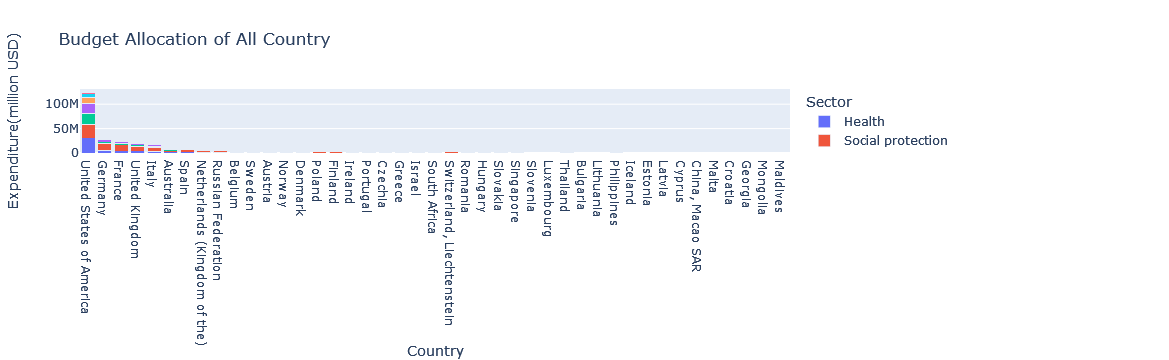

In [457]:
budget_allocation_of_countries = df.groupby(['Country','Sector']).agg({'Expenditure(million USD)': 'sum'}).reset_index().sort_values(by='Expenditure(million USD)', ascending=False)
fig = px.bar(budget_allocation_of_countries, x='Country', y='Expenditure(million USD)', color='Sector', title='Budget Allocation of All Country', barmode='stack')
fig.show()

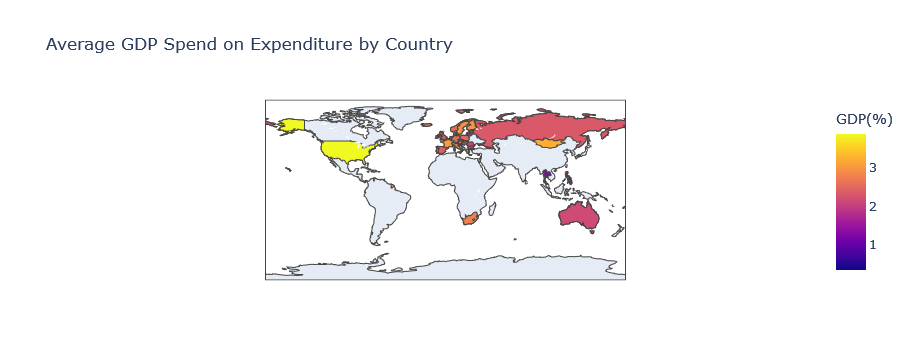

In [383]:
fig = px.choropleth(average_gdp, locations='Country', locationmode='country names', color='GDP(%)', hover_name='Country', title='Average GDP Spend on Expenditure by Country')
fig.show()

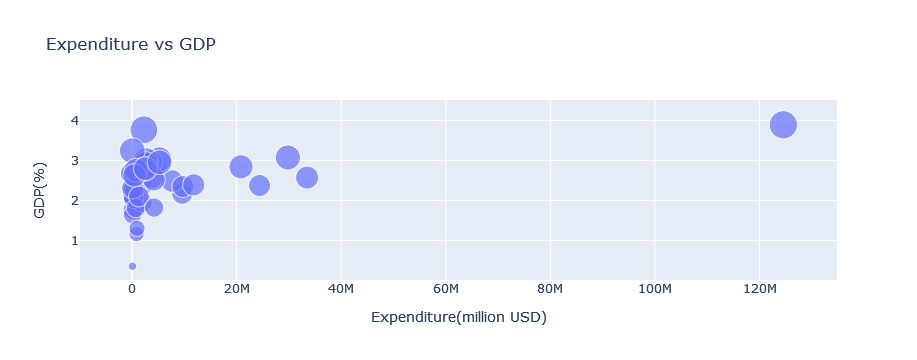

In [323]:
exp_vs_gdp = df_groupby.groupby('Country').agg({'Expenditure(million USD)': 'sum', 'GDP(%)': 'mean'}).reset_index()
fig = px.scatter(exp_vs_gdp, x='Expenditure(million USD)', y='GDP(%)', size='GDP(%)', hover_name='Country', title='Expenditure vs GDP')
fig.show()

<h3><b>Exploring Data based on sector categories and country region to create a much more viable visualization</b></h3>

<h5><b>First I want to categorize the sectors into three categories.</b></h5>
<ul>
    <li>Economic Activities</li>
    <li>Public Services</li>
    <li>Other Sectors</li>
</ul>

and then categorize the country into country region

In [346]:
# Define the sector category mapping
sector_category_mapping = {
    'Agriculture, forestry, fishing and hunting': 'Economic Activities',
    'Mining, manufacturing and construction': 'Economic Activities',
    'Transport': 'Economic Activities',
    'Fuel and energy': 'Economic Activities',
    'Environment protection': 'Economic Activities',
    'Housing and community amenities': 'Economic Activities',
    'Health': 'Public Services',
    'Education': 'Public Services',
    'Social protection': 'Public Services',
    'General public services': 'Public Services',
    'Defence': 'Public Services',
    'Public order and safety': 'Public Services',
    'Recreation, culture and religion': 'Public Services',
    'General economic, commercial and labour affairs': 'Other Sectors',
    'Other industries': 'Other Sectors',
    'RandD Economic affairs': 'Other Sectors',
    'Economic affairs n.e.c.': 'Other Sectors',
    'Communication': 'Other Sectors',
    'Others': 'Other Sectors'
}
country_region_mapping = {
    'Australia': 'Oceania',
    'Austria': 'Western Europe',
    'Belgium': 'Western Europe',
    'Bulgaria': 'Eastern Europe',
    'China, Macao SAR': 'East Asia',
    'Croatia': 'Eastern Europe',
    'Cyprus': 'Middle East',
    'Czechia': 'Eastern Europe',
    'Denmark': 'Western Europe',
    'Estonia': 'Eastern Europe',
    'Finland': 'Western Europe',
    'France': 'Western Europe',
    'Georgia': 'Eastern Europe',
    'Germany': 'Western Europe',
    'Greece': 'Eastern Europe',
    'Hungary': 'Eastern Europe',
    'Iceland': 'Western Europe',
    'Ireland': 'Western Europe',
    'Israel': 'Middle East',
    'Italy': 'Western Europe',
    'Latvia': 'Eastern Europe',
    'Lithuania': 'Eastern Europe',
    'Luxembourg': 'Western Europe',
    'Maldives': 'South Asia',
    'Malta': 'Western Europe',
    'Mongolia': 'East Asia',
    'Netherlands (Kingdom of the)': 'Western Europe',
    'Norway': 'Western Europe',
    'Philippines': 'Southeast Asia',
    'Poland': 'Eastern Europe',
    'Portugal': 'Western Europe',
    'Romania': 'Eastern Europe',
    'Russian Federation': 'Eastern Europe',
    'Singapore': 'Southeast Asia',
    'Slovakia': 'Eastern Europe',
    'Slovenia': 'Eastern Europe',
    'South Africa': 'Africa',
    'Spain': 'Western Europe',
    'Sweden': 'Western Europe',
    'Switzerland, Liechtenstein': 'Western Europe',
    'Thailand': 'Southeast Asia',
    'United Kingdom': 'Western Europe',
    'United States of America': 'North America'
}

In [352]:
df_sector_categorized = df.copy()
df_sector_categorized['Sector Category'] = df_sector_categorized['Sector'].map(sector_category_mapping)
df_sector_categorized.drop('Sector', axis=1, inplace=True)
df_sector_categorized = df_sector_categorized.groupby(['Year', 'Country', 'Sector Category']).agg({'Expenditure(million USD)': 'sum', 'GDP(%)': 'sum'}).reset_index()
df_sector_categorized

Year                       Country      Sector Category  \
0     2000                     Australia  Economic Activities   
1     2000                     Australia        Other Sectors   
2     2000                     Australia      Public Services   
3     2000                       Austria  Economic Activities   
4     2000                       Austria        Other Sectors   
5     2000                       Austria      Public Services   
6     2000                       Belgium  Economic Activities   
7     2000                       Belgium      Public Services   
8     2000                      Bulgaria  Economic Activities   
9     2000                      Bulgaria        Other Sectors   
10    2000                      Bulgaria      Public Services   
11    2000              China, Macao SAR  Economic Activities   
12    2000              China, Macao SAR      Public Services   
13    2000                       Croatia  Economic Activities   
14    2000                       Croatia        Other Sectors   
15    2000                       Croatia      Public Services   
16    2000                        Cyprus  Economic Activities   
17    2000                        Cyprus        Other Sectors   
18    2000                        Cyprus      Public Services   
19    2000                       Czechia  Economic Activities   
20    2000                       Czechia        Other Sectors   
21    2000                       Czechia      Public Services   
22    2000                       Denmark  Economic Activities   
23    2000                       Denmark        Other Sectors   
24    2000                       Denmark      Public Services   
25    2000                       Estonia  Economic Activities   
26    2000                       Estonia        Other Sectors   
27    2000                       Estonia      Public Services   
28    2000                       Finland  Economic Activities   
29    2000                       Finland      Public Services   
30    2000                        France  Economic Activities   
31    2000                        France        Other Sectors   
32    2000                        France      Public Services   
33    2000                       Georgia  Economic Activities   
34    2000                       Georgia        Other Sectors   
35    2000                       Georgia      Public Services   
36    2000                       Germany  Economic Activities   
37    2000                       Germany        Other Sectors   
38    2000                       Germany      Public Services   
39    2000                        Greece  Economic Activities   
40    2000                        Greece      Public Services   
41    2000                       Hungary  Economic Activities   
42    2000                       Hungary        Other Sectors   
43    2000                       Hungary      Public Services   
44    2000                       Iceland  Economic Activities   
45    2000                       Iceland        Other Sectors   
46    2000                       Iceland      Public Services   
47    2000                       Ireland  Economic Activities   
48    2000                       Ireland        Other Sectors   
49    2000                       Ireland      Public Services   
50    2000                        Israel  Economic Activities   
51    2000                        Israel      Public Services   
52    2000                         Italy  Economic Activities   
53    2000                         Italy      Public Services   
54    2000                        Latvia  Economic Activities   
55    2000                        Latvia      Public Services   
56    2000                     Lithuania  Economic Activities   
57    2000                     Lithuania        Other Sectors   
58    2000                     Lithuania      Public Services   
59    2000                    Luxembourg  Economic Activities   
60    2000                    Luxembourg 

In [355]:
df_country_region = df.copy()
df_country_region['Country Region'] = df_country_region['Country'].map(country_region_mapping)
df_country_region.drop('Country', axis=1, inplace=True)
df_country_region = df_country_region.groupby(['Year', 'Country Region', 'Sector']).agg({'Expenditure(million USD)': 'sum', 'GDP(%)': 'mean'}).reset_index()
df_country_region

Year  Country Region                                           Sector  \
0     2000          Africa       Agriculture, forestry, fishing and hunting   
1     2000          Africa                                          Defence   
2     2000          Africa                                        Education   
3     2000          Africa                           Environment protection   
4     2000          Africa                                  Fuel and energy   
5     2000          Africa                          General public services   
6     2000          Africa                                           Health   
7     2000          Africa                  Housing and community amenities   
8     2000          Africa           Mining, manufacturing and construction   
9     2000          Africa                          Public order and safety   
10    2000          Africa                 Recreation, culture and religion   
11    2000          Africa                                Social protection   
12    2000          Africa                                        Transport   
13    2000       East Asia                                          Defence   
14    2000       East Asia                                        Education   
15    2000       East Asia                           Environment protection   
16    2000       East Asia                          General public services   
17    2000       East Asia                                           Health   
18    2000       East Asia                  Housing and community amenities   
19    2000       East Asia                          Public order and safety   
20    2000       East Asia                 Recreation, culture and religion   
21    2000       East Asia                                Social protection   
22    2000  Eastern Europe       Agriculture, forestry, fishing and hunting   
23    2000  Eastern Europe                                    Communication   
24    2000  Eastern Europe                                          Defence   
25    2000  Eastern Europe                          Economic affairs n.e.c.   
26    2000  Eastern Europe                                        Education   
27    2000  Eastern Europe                           Environment protection   
28    2000  Eastern Europe                                  Fuel and energy   
29    2000  Eastern Europe  General economic, commercial and labour affairs   
30    2000  Eastern Europe                          General public services   
31    2000  Eastern Europe                                           Health   
32    2000  Eastern Europe                  Housing and community amenities   
33    2000  Eastern Europe           Mining, manufacturing and construction   
34    2000  Eastern Europe                                 Other industries   
35    2000  Eastern Europe                          Public order and safety   
36    2000  Eastern Europe                           RandD Economic affairs   
37    2000  Eastern Europe                 Recreation, culture and religion   
38    2000  Eastern Europe                                Social protection   
39    2000  Eastern Europe                                        Transport   
40    2000     Middle East       Agriculture, forestry, fishing and hunting   
41    2000     Middle East                                    Communication   
42    2000     Middle East                                          Defence   
43    2000     Middle East                          Economic affairs n.e.c.   
44    2000     Middle East                                        Education   
45    2000     Middle East                           Environment protection   
46    2000     Middle East                                  Fuel and energy   
47    2000     Middle East  General economic, commercial and labour affairs   
48    2000     Middle East                          General public services   
49    2000     Middle East                              

<h5><b>let's combine both function and make it into a new dataframe called df_combined</b></h5>

In [357]:
df_combined = df.copy()
df_combined['Sector Category'] = df_combined['Sector'].map(sector_category_mapping)
df_combined.drop('Sector', axis=1, inplace=True)
df_combined = df_combined.groupby(['Year', 'Country', 'Sector Category']).agg({
    'Expenditure(million USD)': 'sum', 'GDP(%)': 'sum'}).reset_index()
df_combined['Country Region'] = df_combined['Country'].map(country_region_mapping)
df_combined.drop('Country', axis=1, inplace=True)
df_combined = df_combined.groupby(['Year', 'Country Region', 'Sector Category']).agg({
    'Expenditure(million USD)': 'sum', 'GDP(%)': 'mean'}).reset_index()
df_combined

Year  Country Region      Sector Category  Expenditure(million USD)  \
0    2000          Africa  Economic Activities                   5,147.7   
1    2000          Africa      Public Services                  39,901.4   
2    2000       East Asia  Economic Activities                      40.1   
3    2000       East Asia      Public Services                   1,227.8   
4    2000  Eastern Europe  Economic Activities                  36,261.2   
5    2000  Eastern Europe        Other Sectors                   2,772.7   
6    2000  Eastern Europe      Public Services                 268,378.4   
7    2000     Middle East  Economic Activities                   1,529.6   
8    2000     Middle East        Other Sectors                     129.0   
9    2000     Middle East      Public Services                  58,296.7   
10   2000   North America  Economic Activities                  54,201.0   
11   2000   North America      Public Services               3,088,424.7   
12   2000         Oceania  Economic Activities                  21,350.6   
13   2000         Oceania        Other Sectors                   2,422.3   
14   2000         Oceania      Public Services                 129,823.5   
15   2000      South Asia  Economic Activities                      44.5   
16   2000      South Asia        Other Sectors                      10.2   
17   2000      South Asia      Public Services                     185.9   
18   2000  Southeast Asia  Economic Activities                   4,319.6   
19   2000  Southeast Asia      Public Services                  23,562.6   
20   2000  Western Europe  Economic Activities                 302,786.1   
21   2000  Western Europe        Other Sectors                 107,635.9   
22   2000  Western Europe      Public Services               3,450,834.2   
23   2001          Africa  Economic Activities                   7,559.1   
24   2001          Africa        Other Sectors                     106.4   
25   2001          Africa      Public Services                  31,411.5   
26   2001       East Asia  Economic Activities                      42.4   
27   2001       East Asia      Public Services                   1,282.4   
28   2001  Eastern Europe  Economic Activities                  53,988.8   
29   2001  Eastern Europe        Other Sectors                   9,539.5   
30   2001  Eastern Europe      Public Services                 309,531.5   
31   2001     Middle East  Economic Activities                   1,979.4   
32   2001     Middle East        Other Sectors                     146.8   
33   2001     Middle East      Public Services                  61,160.7   
34   2001   North America  Economic Activities                  57,886.8   
35   2001   North America      Public Services               3,305,495.3   
36   2001         Oceania  Economic Activities                  20,384.4   
37   2001         Oceania        Other Sectors                   2,869.0   
38   2001         Oceania      Public Services                 121,896.0   
39   2001      South Asia  Economic Activities                      62.1   
40   2001      South Asia        Other Sectors                      10.7   
41   2001      South Asia      Public Services                     173.2   
42   2001  Southeast Asia  Economic Activities                   3,158.2   
43   2001  Southeast Asia      Public Services                  24,810.0   
44   2001  Western Europe  Economic Activities                 372,062.2   
45   2001  Western Europe        Other Sectors                 128,116.3   
46   2001  Western Europe      Public Services               3,480,164.6   
47   2002          Africa  Economic Activities                   7,780.4   
48   2002          Africa        Other Sectors                      93.6   
49   2002          Africa      Public Services                  29,381.0   
50   2002       East Asia  Economic Activities                      43.4   
51   2002       East Asia      Public Services       

<h5><b>Let's visualize df_combined</b></h5>

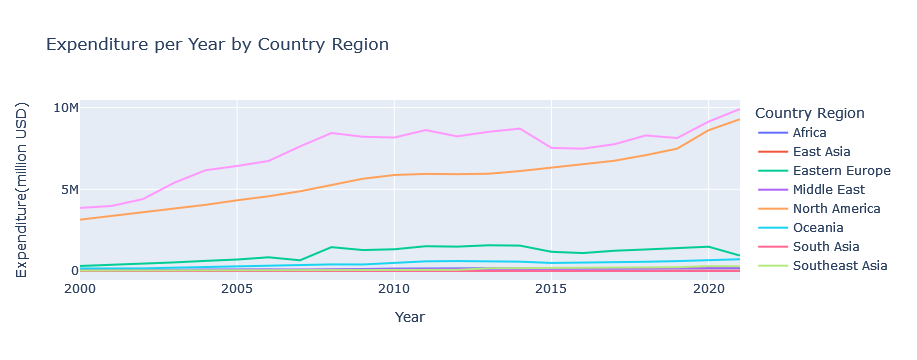

In [359]:
combined_total_exp_per_year = df_combined.groupby(['Year', 'Country Region'])['Expenditure(million USD)'].sum().reset_index()
fig = px.line(combined_total_exp_per_year, x='Year', y='Expenditure(million USD)', color='Country Region', title='Expenditure per Year by Country Region')
fig.show()

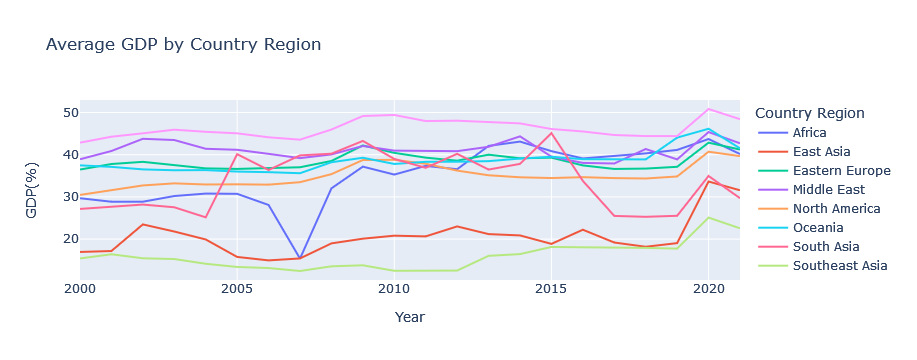

In [380]:
combined_average_gdp_per_year = df_combined.groupby(['Year', 'Country Region'])['GDP(%)'].sum().reset_index()
fig = px.line(combined_average_gdp_per_year, x='Year', y='GDP(%)', color='Country Region', title='Average GDP by Country Region')
fig.show()

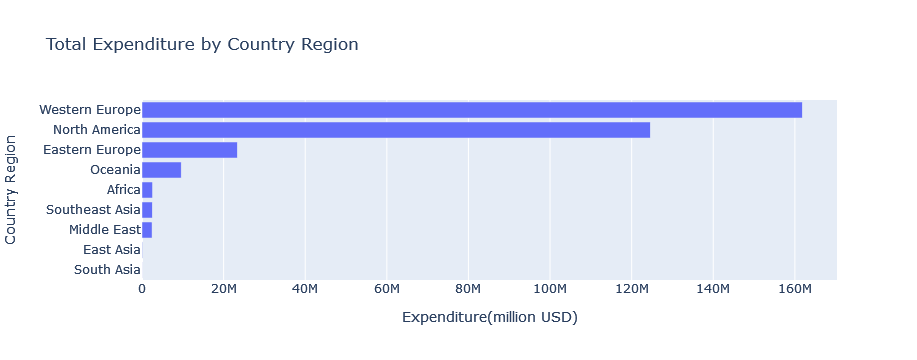

In [381]:
combined_total_expenditure = df_combined.groupby('Country Region', as_index=False)['Expenditure(million USD)'].sum(numeric_only=True).reset_index().sort_values(by='Expenditure(million USD)', ascending=True)
fig = px.bar(combined_total_expenditure, x='Expenditure(million USD)', y='Country Region', orientation='h', title='Total Expenditure by Country Region')
fig.show()

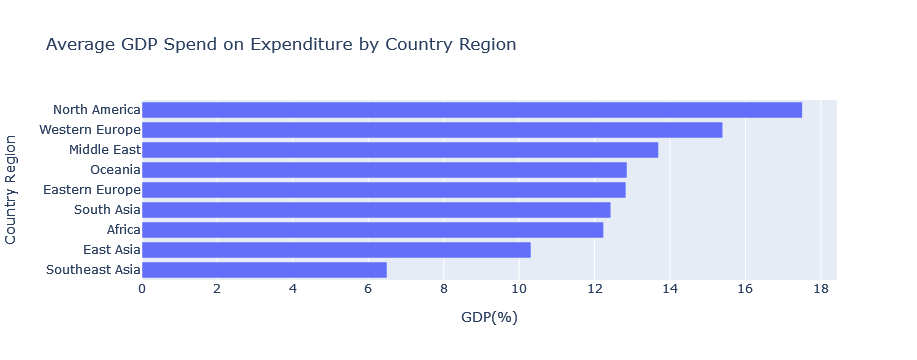

In [382]:
combined_average_gdp = df_combined.groupby('Country Region', as_index=False)['GDP(%)'].mean(numeric_only=True).reset_index().sort_values(by='GDP(%)', ascending=True)
fig = px.bar(combined_average_gdp, x='GDP(%)', y='Country Region', orientation='h', title='Average GDP Spend on Expenditure by Country Region')
fig.show()

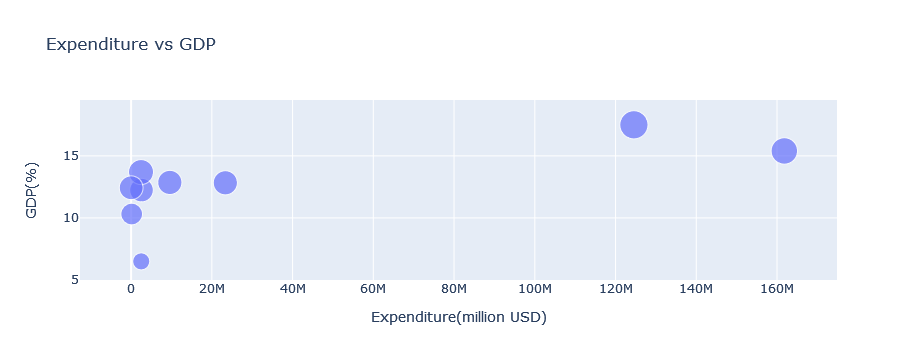

In [384]:
combined_exp_vs_gdp = df_combined.groupby('Country Region').agg({'Expenditure(million USD)': 'sum', 'GDP(%)': 'mean'}).reset_index()
fig = px.scatter(combined_exp_vs_gdp, x='Expenditure(million USD)', y='GDP(%)', size='GDP(%)', hover_name='Country Region', title='Expenditure vs GDP')
fig.show()

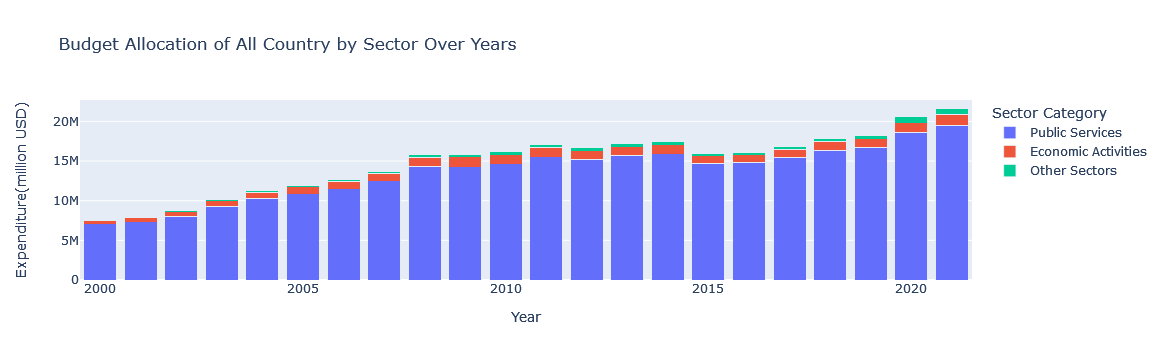

In [412]:
combined_budget_allocation_per_year = df_combined.groupby(['Year', 'Sector Category']).agg({'Expenditure(million USD)': 'sum'}).reset_index().sort_values(by='Expenditure(million USD)', ascending=False)
fig = px.bar(combined_budget_allocation_per_year, x='Year', y='Expenditure(million USD)', color='Sector Category', title='Budget Allocation of All Country by Sector Over Years', barmode='stack')
fig.show()

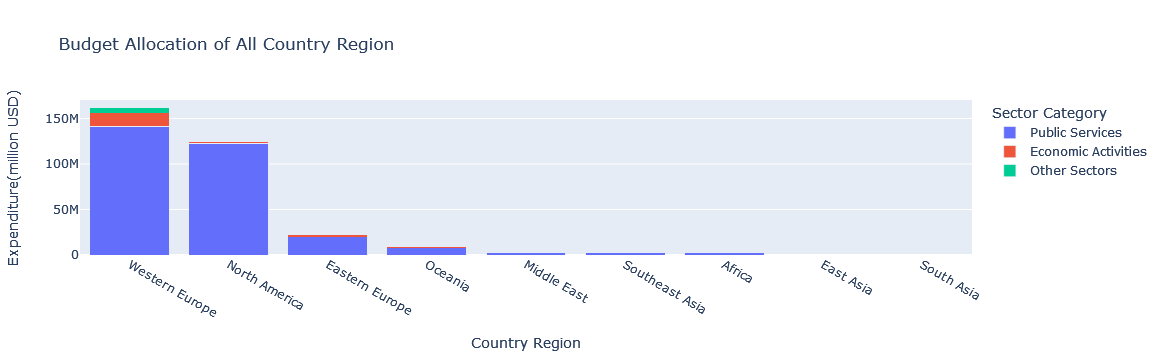

In [411]:
combined_budget_allocation_of_countries = df_combined.groupby(['Country Region','Sector Category']).agg({'Expenditure(million USD)': 'sum'}).reset_index().sort_values(by='Expenditure(million USD)', ascending=False)
fig = px.bar(combined_budget_allocation_of_countries, x='Country Region', y='Expenditure(million USD)', color='Sector Category', title='Budget Allocation of All Country Region', barmode='stack')
fig.show()